## Explore the provided data

In [1]:
# STL imports
from pathlib import Path

# package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ase
import ase.io
import ase.visualize

# project imports
import sisclab22p6.data
import sisclab22p6.features
import sisclab22p6.features_plotters

In [2]:
filepath_data = "../../../../data/jij"
filename_table = "d_block_magnetic_data_modified.csv"
filename_structures = "dimer_clusters.extxyz"
table = sisclab22p6.data.load_jij_data(filepath = filepath_data, 
                                       filename_table=filename_table, 
                                       filename_structures=filename_structures)

table.head()

Loaded Number samples: 1730, 1730.


workchain_label  imp0  imp1  ilayer0  ilayer1  offset0  offset1  \
0  Sc:Ti:Bi2Te3_il_3_3_Off_1    21    22        3        3        0        1   
1   Sc:Y:Bi2Te3_il_3_3_Off_1    21    39        3        3        0        1   
2  Sc:Sc:Bi2Te3_il_3_3_Off_1    21    21        3        3        0        1   
3  Mn:Sc:Bi2Te3_il_3_3_Off_1    25    21        3        3        0        1   
4  Cr:Sc:Bi2Te3_il_3_3_Off_1    24    21        3        3        0        1   

                                           structure             J  \
0  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...  1.242709e-02   
1  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i... -2.337413e-21   
2  (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i... -5.764835e-21   
3  (Atom('Mn', [0.0, 0.0, 0.0], mass=54.938045, i...  8.237921e-02   
4  (Atom('Cr', [0.0, 0.0, 0.0], mass=51.9961, ind...  3.978618e-02   

              D  ...  KKR_rcut1  KKR_rcut_unit        rx   ry   rz         r  \
0  2.952999e-03  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   
1  3.586830e-22  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   
2  1.383125e-21  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   
3  8.294382e-03  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   
4  2.661418e-02  ...        4.0       Angstrom -0.418515  0.0  0.0  0.418515   

           mom1          mom2       tot_mom  \
0  1.856702e-06  8.152756e-01  8.152775e-01   
1 -4.173850e-11 -3.308398e-11 -7.482248e-11   
2 -4.285949e-11 -4.675482e-11 -8.961432e-11   
3  4.409489e+00  1.069743e-02  4.420186e+00   
4  3.815394e+00  4.514470e-03  3.819909e+00   

                               jij_uuid  
0  9ec53578-777c-4884-a3a7-084ad3586748  
1  b218302c-a882-46f3-b4d7-e148d9f1cb0b  
2  19f51d50-b554-4eb1-b106-a9e78a1831f4  
3  93cdd1c9-1cb4-4674-aefd-f427f7d23ef8  
4  de909ef1-e7c6-4566-b585-1c0d3f072f40  

[5 rows x 24 columns]

In [3]:
structures = table.structure
structures

0       (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...
1       (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...
2       (Atom('Sc', [0.0, 0.0, 0.0], mass=44.955912, i...
3       (Atom('Mn', [0.0, 0.0, 0.0], mass=54.938045, i...
4       (Atom('Cr', [0.0, 0.0, 0.0], mass=51.9961, ind...
                              ...                        
1725    (Atom('Cr', [0.0, 0.0, 0.0], mass=51.9961, ind...
1726    (Atom('Mn', [0.0, 0.0, 0.0], mass=54.938045, i...
1727    (Atom('Mo', [0.0, 0.0, 0.0], mass=95.96, index...
1728    (Atom('Nb', [0.0, 0.0, 0.0], mass=92.90638, in...
1729    (Atom('Nb', [0.0, 0.0, 0.0], mass=92.90638, in...
Name: structure, Length: 1730, dtype: object

In [37]:
# get max num atoms
n_atoms_max = max(struc.get_global_number_of_atoms() for struc in structures)
n_atoms_max

# # poyen: hard-coded to 22
# n_atoms_max = 22

14

In [38]:
# get target property to predict: (magnetic) isotropic exchange interaction Jij
y = table.J.values
print(f"{y.shape=}")

y.shape=(1730,)


(array([1.000e+00, 3.000e+00, 6.000e+00, 2.000e+00, 1.000e+01, 1.000e+00,
        3.000e+00, 5.000e+00, 1.600e+01, 6.500e+01, 1.404e+03, 1.470e+02,
        3.400e+01, 9.000e+00, 7.000e+00, 5.000e+00, 5.000e+00, 1.000e+00,
        3.000e+00, 3.000e+00]),
 array([-22.86858534, -20.70107177, -18.5335582 , -16.36604463,
        -14.19853106, -12.03101749,  -9.86350392,  -7.69599036,
         -5.52847679,  -3.36096322,  -1.19344965,   0.97406392,
          3.14157749,   5.30909106,   7.47660463,   9.6441182 ,
         11.81163177,  13.97914534,  16.14665891,  18.31417248,
         20.48168605]),
 <BarContainer object of 20 artists>)

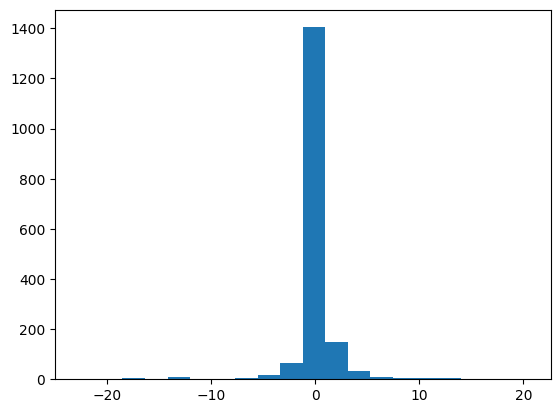

In [39]:
# plot histogram of target property
plt.hist(y, bins = 20)

## Create a benchmark study to learn the Jij interaction (column J in the provided data table) from the provided structures. 
As descriptors, use Coulomb Matrix and SOAP. As models, use KRR and GPR. Compare the implementations in DScribe, scikit-learn and librascal implementations. 

## Coulomb Matrix

In [40]:
from dscribe.descriptors import CoulombMatrix

# Setting up the CM descriptor
cm = CoulombMatrix(
    n_atoms_max=n_atoms_max,
    permutation='sorted_l2'
)

In [52]:
structure = structures[1000]

In [53]:
ase.visualize.view(structure, viewer='x3d')

In [41]:
X_coulomb = cm.create(structures, n_jobs=-1)
print(f"{X_coulomb.shape=}")

X_coulomb.shape=(1730, 196)


In [42]:
x = X_coulomb

In [43]:
import math, random

rand_mol = random.randint(0, len(y))
print(x[rand_mol])

[6567.16652708  616.93422954  616.93422954  468.90219881  721.54111634
  721.54111634  431.34668879  603.32606312  603.32606312  418.36559483
  346.25735735  346.25735735  806.59237197  448.40977436  616.93422954
 6567.16652708  616.93422949  721.54111634  721.54111636  468.90219878
  603.32606312  431.34668877  603.32606313  346.25735735  418.36559483
  346.25735734  806.59237192  448.40977435  616.93422954  616.93422949
 6567.16652708  721.54111634  468.90219878  721.54111636  603.32606312
  603.32606313  431.34668877  346.25735735  346.25735734  418.36559483
  806.59237192  448.40977435  468.90219881  721.54111634  721.54111634
 6567.16652708  616.93422954  616.93422954  418.36559548  346.25735772
  346.25735772  431.34668838  603.326062    603.326062    478.98316806
  755.10775248  721.54111634  721.54111636  468.90219878  616.93422954
 6567.16652708  616.93422949  346.25735772  346.25735771  418.36559548
  603.326062    603.32606202  431.34668836  478.98316805  755.10775244
  721.

In [44]:
x[rand_mol].shape

(196,)

<Figure size 640x480 with 0 Axes>

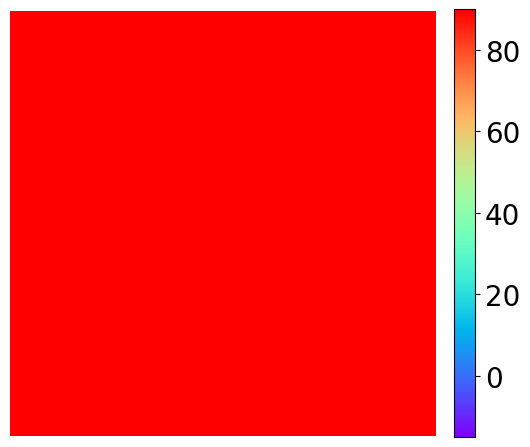

In [47]:
# Visualize the Coulomb matrix of the random molecule.

import matplotlib.pyplot as plt

shape = (n_atoms_max, n_atoms_max)
mat = x[rand_mol].reshape(shape)

plt.figure()
plt.figure(figsize = (6,6))
plt.imshow(mat, origin="upper", cmap='rainbow', vmin=-15, vmax=90, interpolation='nearest')
plt.colorbar(fraction=0.046, pad=0.04).ax.tick_params(labelsize=20)
plt.axis('off')
plt.show()

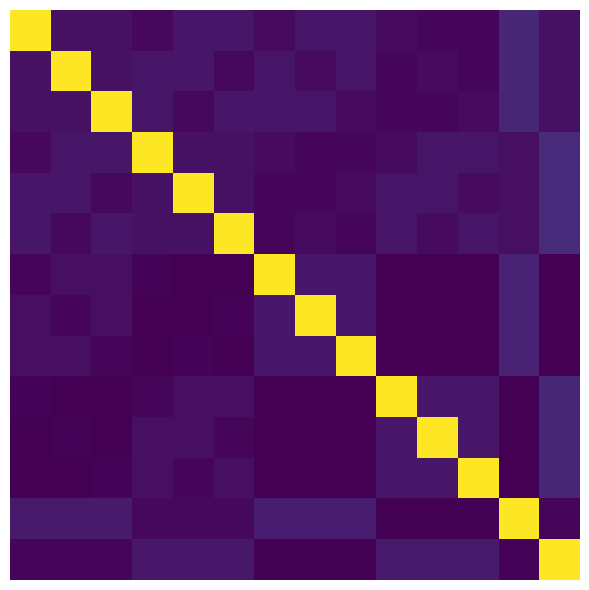

In [48]:
fig = sisclab22p6.features_plotters.plot_feature_matrix(mat, transpose=False)

In [35]:
## shuffle the data
import random

c = list(zip(x, y))
random.shuffle(c)

x, y = zip(*c)

x = np.array(x)
y = np.array(y)

### KKR and set test size = 0.1

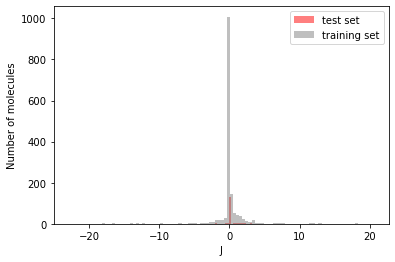

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
plt.xlabel("J")
plt.ylabel("Number of molecules")
plt.legend()
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

alpha = np.logspace(-4, -2, 3)
gamma = np.logspace(-4, -2, 3)

cv_number = 3 ## choose into how many parts training set is divided for cross-validation
kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

## define settings for grid search routine in scikit-learn with above defined grids as input

grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                           [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                           cv = cv_number, 
                           scoring = scoring_function,
                           verbose=3)  ## produces detailed output statements of grid search 
                                          # routine so we can see what is computed
    
# call the fit function in scikit-learn which fits the Coulomb matrices in the training set 
# to their corresponding Jij.
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.363 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.464 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.389 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.417 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.537 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.443 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.417 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.537 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.443 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.363 total time=   0.1s
[CV 2/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.465 total time=   0.1s
[CV 3

GridSearchCV(cv=3, estimator=KernelRidge(),
             param_grid=[{'alpha': array([0.0001, 0.001 , 0.01  ]),
                          'gamma': array([0.0001, 0.001 , 0.01  ]),
                          'kernel': ['rbf']}],
             scoring='neg_mean_absolute_error', verbose=3)

Mean absolute error on test set: 0.122 eV


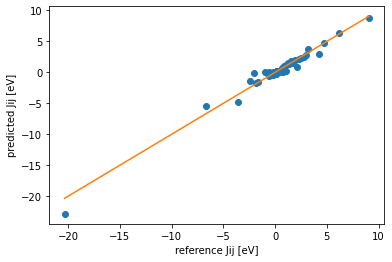

R^2 score on test set: 0.969


In [22]:
# predicted Jij for all test molecules

y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                     # of hyperparameters from grid search

print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

# do the regression plot
plt.plot(y_test, y_pred, 'o')
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
plt.xlabel('reference Jij [eV]')
plt.ylabel('predicted Jij [eV]')
plt.show()
print("R^2 score on test set: %.3f" % r2_score(y_test, y_pred))

### KKR and set test size = 0.25

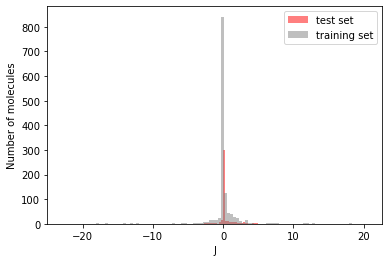

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
plt.xlabel("J")
plt.ylabel("Number of molecules")
plt.legend()
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

alpha = np.logspace(-4, -2, 3)
gamma = np.logspace(-4, -2, 3)

cv_number = 3 ## choose into how many parts training set is divided for cross-validation
kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

## define settings for grid search routine in scikit-learn with above defined grids as input

grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                           [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                           cv = cv_number, 
                           scoring = scoring_function,
                           verbose=3)  ## produces detailed output statements of grid search 
                                          # routine so we can see what is computed
    
# call the fit function in scikit-learn which fits the Coulomb matrices in the training set 
# to their corresponding Jij.
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.423 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.424 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.432 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.499 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.471 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.485 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.499 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.471 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.485 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.423 total time=   0.0s
[CV 2/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.424 total time=   0.0s
[CV 3

GridSearchCV(cv=3, estimator=KernelRidge(),
             param_grid=[{'alpha': array([0.0001, 0.001 , 0.01  ]),
                          'gamma': array([0.0001, 0.001 , 0.01  ]),
                          'kernel': ['rbf']}],
             scoring='neg_mean_absolute_error', verbose=3)

Mean absolute error on test set: 0.250 eV


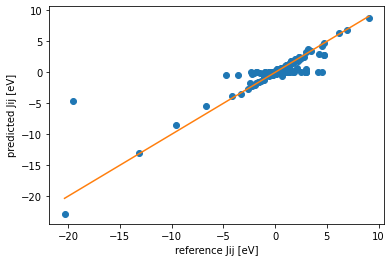

R^2 score on test set: 0.771


In [25]:
# predicted Jij for all test molecules

y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                     # of hyperparameters from grid search

print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

# do the regression plot
plt.plot(y_test, y_pred, 'o')
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
plt.xlabel('reference Jij [eV]')
plt.ylabel('predicted Jij [eV]')
plt.show()
print("R^2 score on test set: %.3f" % r2_score(y_test, y_pred))

### KKR and set test size = 0.35

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
plt.xlabel("J")
plt.ylabel("Number of molecules")
plt.legend()
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

alpha = np.logspace(-4, -2, 3)
gamma = np.logspace(-4, -2, 3)

cv_number = 3 ## choose into how many parts training set is divided for cross-validation
kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

## define settings for grid search routine in scikit-learn with above defined grids as input

grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                           [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                           cv = cv_number, 
                           scoring = scoring_function,
                           verbose=3)  ## produces detailed output statements of grid search 
                                          # routine so we can see what is computed
    
# call the fit function in scikit-learn which fits the Coulomb matrices in the training set 
# to their corresponding Jij.
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.529 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.465 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.577 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.584 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.557 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.577 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.584 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.557 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.474 total time=   0.0s
[CV 2/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.529 total time=   0.0s
[CV 3

GridSearchCV(cv=3, estimator=KernelRidge(),
             param_grid=[{'alpha': array([0.0001, 0.001 , 0.01  ]),
                          'gamma': array([0.0001, 0.001 , 0.01  ]),
                          'kernel': ['rbf']}],
             scoring='neg_mean_absolute_error', verbose=3)

Mean absolute error on test set: 0.286 eV


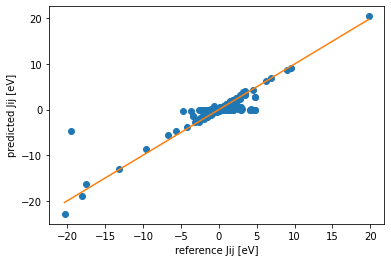

R^2 score on test set: 0.821


In [28]:
# predicted Jij for all test molecules

y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                     # of hyperparameters from grid search

print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

# do the regression plot
plt.plot(y_test, y_pred, 'o')
plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
plt.xlabel('reference Jij [eV]')
plt.ylabel('predicted Jij [eV]')
plt.show()
print("R^2 score on test set: %.3f" % r2_score(y_test, y_pred))

## SOAP

### Method 1: Conctenate SOAP vector

In [30]:
# get structures from table
structures =  list(table.structure)
samples = structures

# get arrays indices of defect atoms
# assumption: all defect atoms are transition metals and have atomic numbers < host crystal atomic numbers (Bi: 83, Te: 52)
defect_atoms_indices = [list(np.asarray(struc.numbers < 52).nonzero()[0]) for struc in structures]
# check that all index pairs are equal, if so, flatten the list
if not all(index_pair == defect_atoms_indices[0] for index_pair in defect_atoms_indices):
    raise Exception("Not all defect atoms indices equal. Have to do by-case featurization.")
defect_atoms_indices = defect_atoms_indices[0]

# get Euclidean coordinates of the defect atoms
positions = [[struc.positions[idx] for idx in defect_atoms_indices] for struc in structures]
# DScribe SOAP needs positions per structure. So do not flatten the list, as we did with indices.

In [31]:
# get chemical species present in the input structures.
species = set(np.concatenate([np.unique(struc.numbers) for struc in structures]))

### KKR and set test size = 0.1

In [35]:
# c = list(zip(x, y))
# random.shuffle(c)

# x, y = zip(*c)

# x = np.array(x)
# y = np.array(y)

n_max= 1, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.775 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.851 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.870 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.693 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.762 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.783 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.768 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.851 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.890 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.018 total time=   0.0s
[CV 2/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.074 tota

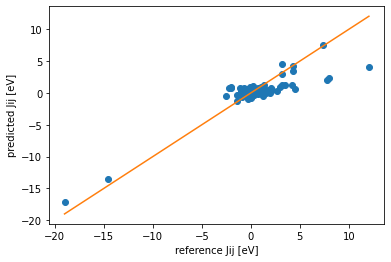

R^2 score on test set: 0.764 

---------------------------------------------------------
n_max= 1, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.790 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.877 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.873 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.709 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.786 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.791 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.843 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.932 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.947 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.028 

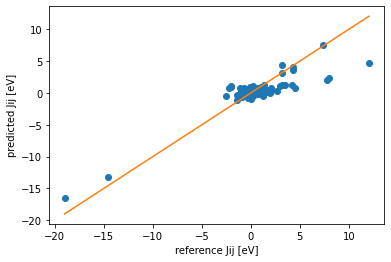

R^2 score on test set: 0.769 

---------------------------------------------------------
n_max= 1, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.799 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.890 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.878 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.719 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.800 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.800 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.879 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.959 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.988 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.032 

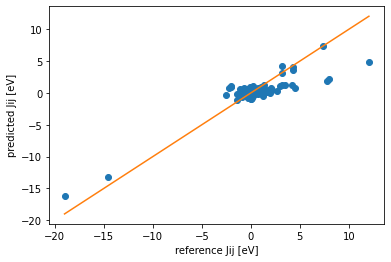

R^2 score on test set: 0.768 

---------------------------------------------------------
n_max= 1, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.802 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.895 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.881 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.734 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.821 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.815 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.926 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.007 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.025 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.038 

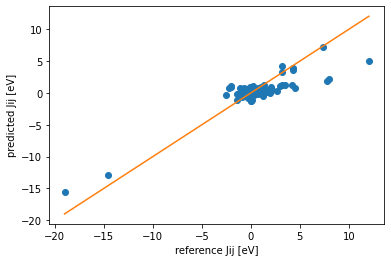

R^2 score on test set: 0.762 

---------------------------------------------------------
n_max= 2, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.906 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.002 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.948 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.843 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.954 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.900 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.125 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.128 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.134 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.017 

R^2 score on test set: 0.618 

---------------------------------------------------------
n_max= 2, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.928 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.027 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.957 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.861 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.988 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.906 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.119 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.162 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.158 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.026 

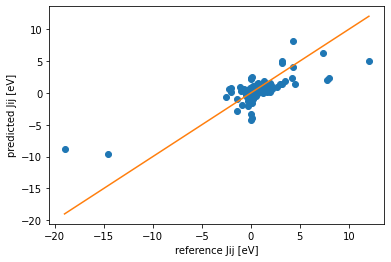

R^2 score on test set: 0.610 

---------------------------------------------------------
n_max= 2, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.941 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.043 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.969 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.884 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.989 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.928 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.096 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.163 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.168 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.035 

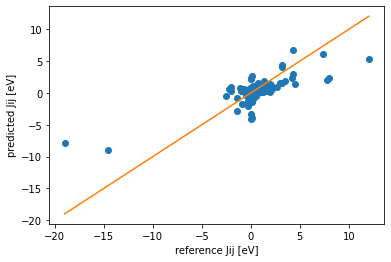

R^2 score on test set: 0.599 

---------------------------------------------------------
n_max= 2, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.945 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.047 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.975 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.902 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.008 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.948 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.114 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.178 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.186 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.039 

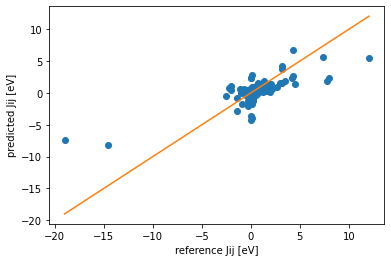

R^2 score on test set: 0.570 

---------------------------------------------------------
n_max= 3, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.967 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.068 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.989 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.960 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.076 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.000 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.180 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.189 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.216 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.025 

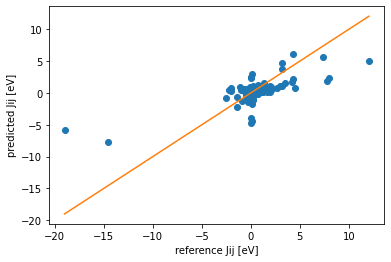

R^2 score on test set: 0.504 

---------------------------------------------------------
n_max= 3, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.990 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.093 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.001 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.968 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.097 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.999 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.126 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.181 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.201 total time=   0.3s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.039 

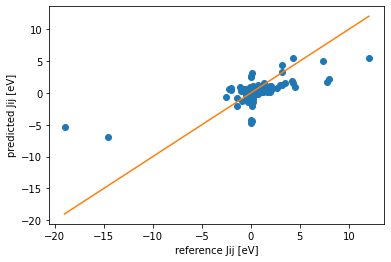

R^2 score on test set: 0.473 

---------------------------------------------------------
n_max= 3, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.998 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.104 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.008 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.979 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.075 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.023 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.098 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.163 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.168 total time=   0.3s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.053 

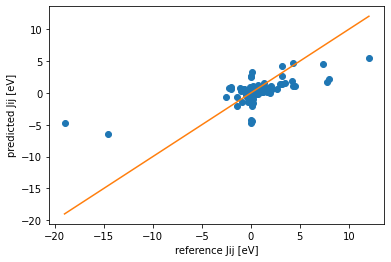

R^2 score on test set: 0.443 

---------------------------------------------------------
n_max= 3, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.002 total time=   0.6s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.106 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.015 total time=   0.5s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.998 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.095 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.042 total time=   0.5s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.077 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.128 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.167 total time=   0.5s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.058 

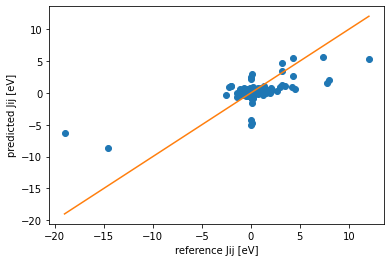

R^2 score on test set: 0.495 

---------------------------------------------------------
n_max= 4, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.942 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.055 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.968 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.007 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.145 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.038 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.043 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.111 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.117 total time=   0.3s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.004 

R^2 score on test set: 0.483 

---------------------------------------------------------
n_max= 4, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.962 total time=   1.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.079 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.975 total time=   0.6s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.004 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.117 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.056 total time=   0.5s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.032 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.102 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.107 total time=   0.5s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.030 

R^2 score on test set: 0.513 

---------------------------------------------------------
n_max= 4, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.968 total time=   0.7s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.082 total time=   0.6s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.981 total time=   0.7s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.020 total time=   0.6s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.109 total time=   0.6s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.084 total time=   0.6s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.010 total time=   0.6s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.063 total time=   0.7s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.100 total time=   0.7s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.040 

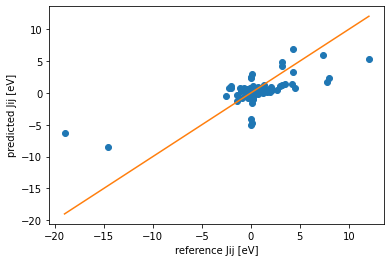

R^2 score on test set: 0.510 

---------------------------------------------------------
n_max= 4, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.974 total time=   1.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.086 total time=   0.9s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.990 total time=   0.8s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.043 total time=   0.9s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.130 total time=   0.9s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.102 total time=   0.8s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.958 total time=   0.9s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.977 total time=   0.9s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.082 total time=   0.9s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.049 

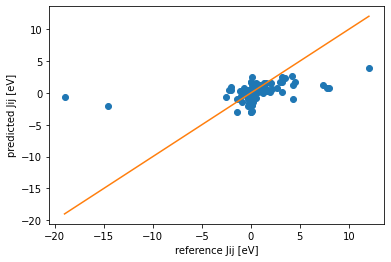

R^2 score on test set: 0.181 

---------------------------------------------------------


In [36]:
from dscribe.descriptors import SOAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

r_cut = 4.0
sigma = 1.0

for n_max in range(1,5):
    for l_max in range(1,5):
        # set up SOAP features using the parameter you change
        soap = SOAP(r_cut= r_cut,
                     n_max= n_max, 
                     l_max= l_max, 
                     sigma= sigma, 
                     rbf= "gto", 
                     weighting= None, 
                     crossover= True, 
                     average= "off", 
                     species= species, 
                     periodic= False, 
                     sparse= False, 
                     dtype= "float64"    
                     )
    
        # then do the model training and evaluation
        samples = structures
        positions = np.zeros((len(samples),1), dtype=int)

        #n_features = soap.get_number_of_features()

        positions = [[0,7] for i in range(len(samples))]

        soap = soap.create(samples, positions, n_jobs=2)  # Parallel
    
        # set soap as features
        x = soap

        # set J as target labels
        y = table.iloc[:,8]
        
        #reshape feature x from (1730,2,10080) to (1730, 20160) by concatenating two vectors
        b = []
        for i in range(len(samples)):
            a = np.concatenate((x[i,0],x[i,1]), axis=None)
            b.append(a)
        x=b

        # Standarization
        scaler = MinMaxScaler()
        x = scaler.fit_transform(x)
    
        #c = list(zip(x, y))
        #random.shuffle(c)

        #x, y = zip(*c)

        #x = np.array(x)
        #y = np.array(y)
        
        print("n_max= %d, l_max=%d \n" % (n_max, l_max))
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

        #plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
        #plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
        #plt.xlabel("J")
        #plt.ylabel("Number of molecules")
        #plt.legend()
        #plt.show()
    
        alpha = np.logspace(-4, -2, 3)
        gamma = np.logspace(-4, -2, 3)

        cv_number = 3 ## choose into how many parts training set is divided for cross-validation
        kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
        scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

        ## define settings for grid search routine in scikit-learn with above defined grids as input

        grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                                   [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                                   cv = cv_number, 
                                   scoring = scoring_function,
                                   verbose=3)  ## produces detailed output statements of grid search 
                                                  # routine so we can see what is computed
    
        # call the fit function in scikit-learn which fits the SOAP matrices in the training set to their corresponding Jij.
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
    
        # predicted Jij for all test molecules

        y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                             # of hyperparameters from grid search

        print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

        # do the regression plot
        plt.plot(y_test, y_pred, 'o')
        plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
        plt.xlabel('reference Jij [eV]')
        plt.ylabel('predicted Jij [eV]')
        plt.show()
        print("R^2 score on test set: %.3f \n" % r2_score(y_test, y_pred))
        print("---------------------------------------------------------")

### KKR and set test size = 0.25

n_max= 1, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.940 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.949 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.977 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.886 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.869 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.909 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.961 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.906 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.971 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.051 total time=   0.0s
[CV 2/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.102 tota

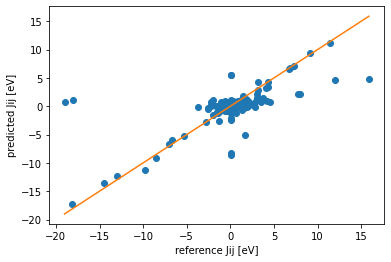

R^2 score on test set: 0.490 

---------------------------------------------------------
n_max= 1, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.975 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.986 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.971 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.916 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.910 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.915 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.019 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.981 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.008 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.076 

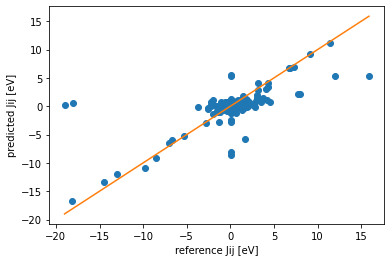

R^2 score on test set: 0.503 

---------------------------------------------------------
n_max= 1, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.993 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.002 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.973 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.930 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.928 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.920 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.045 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.025 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.045 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.092 

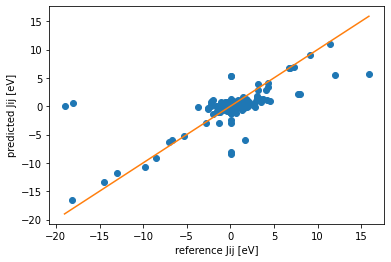

R^2 score on test set: 0.507 

---------------------------------------------------------
n_max= 1, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.998 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.008 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.975 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.948 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.948 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.927 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.066 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.055 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.068 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.105 

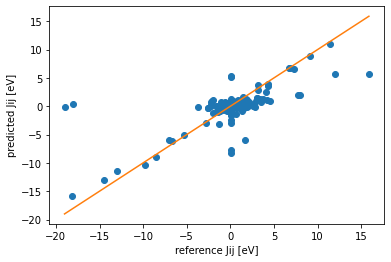

R^2 score on test set: 0.511 

---------------------------------------------------------
n_max= 2, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.052 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.024 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.005 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.019 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.951 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.932 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.139 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.104 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.171 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.077 

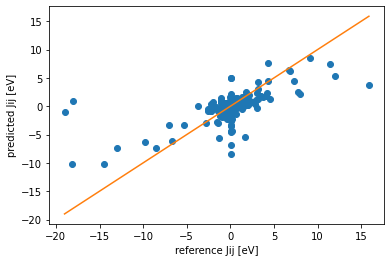

R^2 score on test set: 0.425 

---------------------------------------------------------
n_max= 2, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.096 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.074 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.004 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.038 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.006 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.945 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.156 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.152 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.182 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.108 

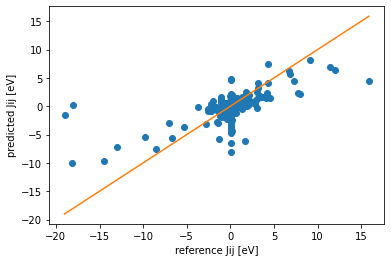

R^2 score on test set: 0.434 

---------------------------------------------------------
n_max= 2, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.119 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.096 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.014 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.051 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.029 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.970 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.170 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.172 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.178 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.134 

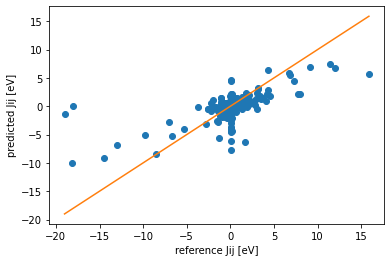

R^2 score on test set: 0.440 

---------------------------------------------------------
n_max= 2, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.123 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.103 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.019 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.060 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.048 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.987 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.158 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.174 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.189 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.141 

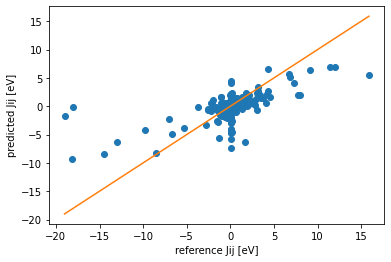

R^2 score on test set: 0.423 

---------------------------------------------------------
n_max= 3, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.107 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.061 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.016 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.096 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.035 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.009 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.157 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.161 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.238 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.105 

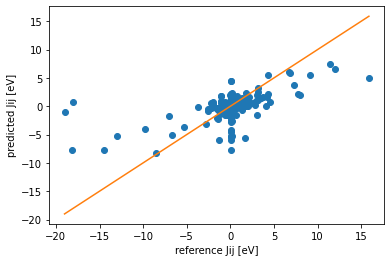

R^2 score on test set: 0.364 

---------------------------------------------------------
n_max= 3, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.146 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.117 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.022 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.109 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.067 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.022 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.139 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.150 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.211 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.137 

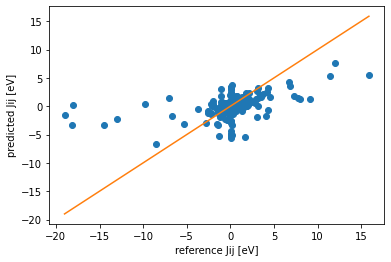

R^2 score on test set: 0.204 

---------------------------------------------------------
n_max= 3, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.159 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.136 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.032 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.112 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.088 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.060 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.131 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.126 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.167 total time=   0.3s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.163 

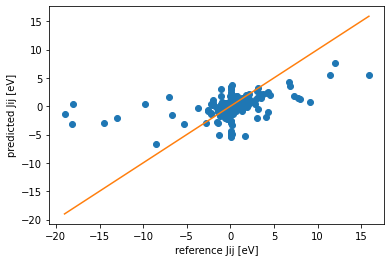

R^2 score on test set: 0.188 

---------------------------------------------------------
n_max= 3, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.161 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.145 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.038 total time=   0.4s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.114 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.103 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.071 total time=   0.4s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.077 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.081 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.166 total time=   0.4s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.170 

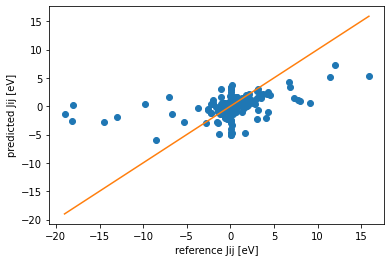

R^2 score on test set: 0.178 

---------------------------------------------------------
n_max= 4, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.094 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.045 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.985 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.110 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.070 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.069 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.065 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.085 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.146 total time=   0.3s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.109 

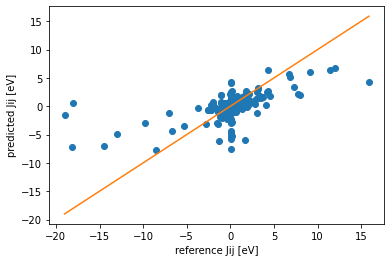

R^2 score on test set: 0.350 

---------------------------------------------------------
n_max= 4, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.124 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.100 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.995 total time=   0.4s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.125 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.096 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.094 total time=   0.4s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.056 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.055 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.124 total time=   0.4s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.149 

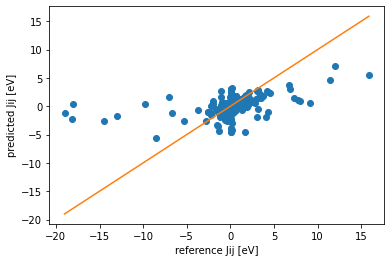

R^2 score on test set: 0.189 

---------------------------------------------------------
n_max= 4, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.129 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.111 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.003 total time=   0.5s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.139 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.126 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.114 total time=   0.5s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.025 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.003 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.103 total time=   0.5s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.165 

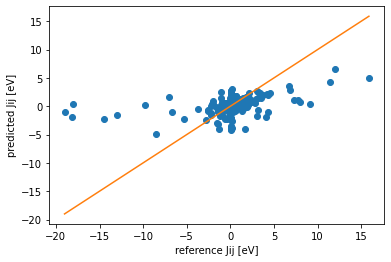

R^2 score on test set: 0.180 

---------------------------------------------------------
n_max= 4, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.130 total time=   0.7s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.123 total time=   0.6s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.012 total time=   0.6s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.141 total time=   0.6s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.140 total time=   0.7s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.123 total time=   0.6s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.940 total time=   0.6s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.910 total time=   0.6s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.097 total time=   0.6s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.171 

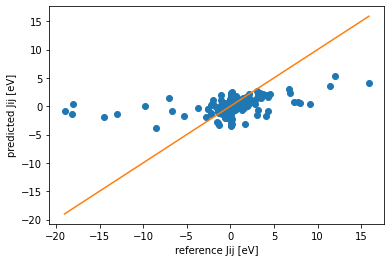

R^2 score on test set: 0.170 

---------------------------------------------------------


In [37]:
from dscribe.descriptors import SOAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

r_cut = 4.0
sigma = 1.0

for n_max in range(1,5):
    for l_max in range(1,5):
        # set up SOAP features using the parameter you change
        soap = SOAP(r_cut= r_cut,
                     n_max= n_max, 
                     l_max= l_max, 
                     sigma= sigma, 
                     rbf= "gto", 
                     weighting= None, 
                     crossover= True, 
                     average= "off", 
                     species= species, 
                     periodic= False, 
                     sparse= False, 
                     dtype= "float64"    
                     )
    
        # then do the model training and evaluation
        samples = structures
        positions = np.zeros((len(samples),1), dtype=int)

        #n_features = soap.get_number_of_features()

        positions = [[0,7] for i in range(len(samples))]

        soap = soap.create(samples, positions, n_jobs=2)  # Parallel
    
        # set soap as features
        x = soap

        # set J as target labels
        y = table.iloc[:,8]
    
         #reshape feature x from (1730,2,10080) to (1730, 20160) by concatenating two vectors
        b = []
        for i in range(len(samples)):
            a = np.concatenate((x[i,0],x[i,1]), axis=None)
            b.append(a)
        x=b

        # Standarization
        scaler = MinMaxScaler()
        x = scaler.fit_transform(x)
    
        #c = list(zip(x, y))
        #random.shuffle(c)

        #x, y = zip(*c)

        #x = np.array(x)
        #y = np.array(y)
        
        print("n_max= %d, l_max=%d \n" % (n_max, l_max))
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

        #plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
        #plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
        #plt.xlabel("J")
        #plt.ylabel("Number of molecules")
        #plt.legend()
        #plt.show()
    
        alpha = np.logspace(-4, -2, 3)
        gamma = np.logspace(-4, -2, 3)

        cv_number = 3 ## choose into how many parts training set is divided for cross-validation
        kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
        scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

        ## define settings for grid search routine in scikit-learn with above defined grids as input

        grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                                   [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                                   cv = cv_number, 
                                   scoring = scoring_function,
                                   verbose=3)  ## produces detailed output statements of grid search 
                                                  # routine so we can see what is computed
    
        # call the fit function in scikit-learn which fits the SOAP matrices in the training set to their corresponding Jij.
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
    
        # predicted Jij for all test molecules

        y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                             # of hyperparameters from grid search

        print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

        # do the regression plot
        plt.plot(y_test, y_pred, 'o')
        plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
        plt.xlabel('reference Jij [eV]')
        plt.ylabel('predicted Jij [eV]')
        plt.show()
        print("R^2 score on test set: %.3f \n" % r2_score(y_test, y_pred))
        print("---------------------------------------------------------")

### KKR and set test size = 0.35

n_max= 1, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.111 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.923 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.030 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.086 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.847 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.937 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.091 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.909 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.007 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.163 total time=   0.0s
[CV 2/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.023 tota

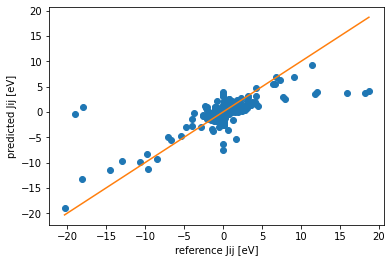

R^2 score on test set: 0.532 

---------------------------------------------------------
n_max= 1, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.177 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.965 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.019 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.148 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.894 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.947 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.169 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.981 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.027 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.213 

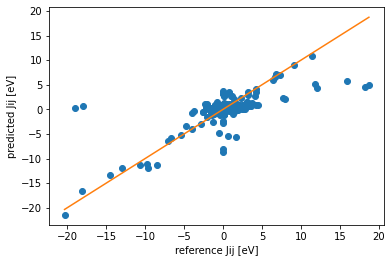

R^2 score on test set: 0.542 

---------------------------------------------------------
n_max= 1, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.204 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.984 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.020 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.169 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.915 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.955 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.204 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.010 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.041 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.233 

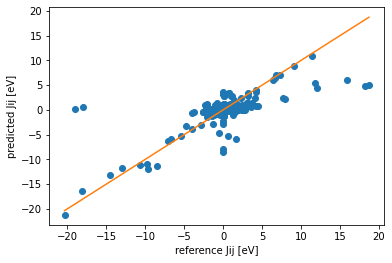

R^2 score on test set: 0.548 

---------------------------------------------------------
n_max= 1, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.215 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.991 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.020 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.183 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.935 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.965 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.219 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.044 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.056 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.254 

R^2 score on test set: 0.551 

---------------------------------------------------------
n_max= 2, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.217 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.974 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.034 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.157 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.896 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.972 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.244 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.074 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.133 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.220 

R^2 score on test set: 0.445 

---------------------------------------------------------
n_max= 2, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.271 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.025 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.031 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.212 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.954 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.978 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.296 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.093 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.140 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.265 

R^2 score on test set: 0.473 

---------------------------------------------------------
n_max= 2, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.298 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.047 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.038 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.222 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.983 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.988 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.303 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.086 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.139 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.289 

R^2 score on test set: 0.482 

---------------------------------------------------------
n_max= 2, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.305 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.055 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.040 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.229 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.003 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.999 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.286 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.096 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.151 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.301 

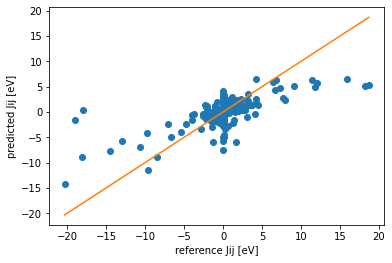

R^2 score on test set: 0.468 

---------------------------------------------------------
n_max= 3, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.252 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.996 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.036 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.222 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.977 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.056 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.290 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.096 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.182 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.255 

R^2 score on test set: 0.405 

---------------------------------------------------------
n_max= 3, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.304 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.051 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.037 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.262 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.015 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.055 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.275 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.067 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.165 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.293 

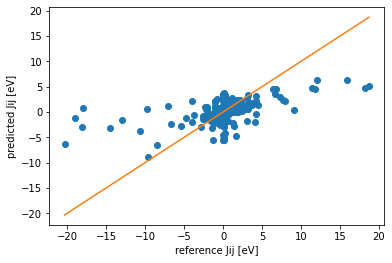

R^2 score on test set: 0.273 

---------------------------------------------------------
n_max= 3, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.322 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.068 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.043 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.260 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.041 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.062 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.240 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.028 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.134 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.318 

R^2 score on test set: 0.259 

---------------------------------------------------------
n_max= 3, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.326 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.076 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.045 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.266 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.060 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.069 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.175 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.011 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.136 total time=   0.3s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.328 

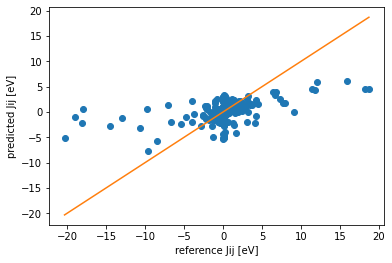

R^2 score on test set: 0.249 

---------------------------------------------------------
n_max= 4, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.236 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.974 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.000 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.252 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.009 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.080 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.201 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.988 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.137 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.259 

R^2 score on test set: 0.272 

---------------------------------------------------------
n_max= 4, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.281 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.026 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.005 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.280 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.067 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.095 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.162 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.971 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.121 total time=   0.3s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.300 

R^2 score on test set: 0.254 

---------------------------------------------------------
n_max= 4, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.288 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.039 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.010 total time=   0.4s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.282 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.084 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.099 total time=   0.4s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.110 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.939 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.110 total time=   0.4s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.319 

R^2 score on test set: 0.237 

---------------------------------------------------------
n_max= 4, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.293 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.050 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.013 total time=   0.5s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.282 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.100 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.104 total time=   0.6s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.002 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.869 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.091 total time=   0.5s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.329 

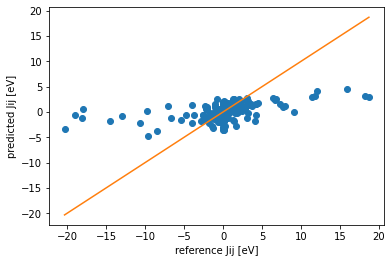

R^2 score on test set: 0.213 

---------------------------------------------------------


In [38]:
from dscribe.descriptors import SOAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

r_cut = 4.0
sigma = 1.0

for n_max in range(1,5):
    for l_max in range(1,5):
        # set up SOAP features using the parameter you change
        soap = SOAP(r_cut= r_cut,
                     n_max= n_max, 
                     l_max= l_max, 
                     sigma= sigma, 
                     rbf= "gto", 
                     weighting= None, 
                     crossover= True, 
                     average= "off", 
                     species= species, 
                     periodic= False, 
                     sparse= False, 
                     dtype= "float64"    
                     )
    
        # then do the model training and evaluation
        samples = structures
        positions = np.zeros((len(samples),1), dtype=int)

        #n_features = soap.get_number_of_features()

        positions = [[0,7] for i in range(len(samples))]

        soap = soap.create(samples, positions, n_jobs=2)  # Parallel
    
        # set soap as features
        x = soap

        # set J as target labels
        y = table.iloc[:,8]
    
         #reshape feature x from (1730,2,10080) to (1730, 20160) by concatenating two vectors
        b = []
        for i in range(len(samples)):
            a = np.concatenate((x[i,0],x[i,1]), axis=None)
            b.append(a)
        x=b

        # Standarization
        scaler = MinMaxScaler()
        x = scaler.fit_transform(x)
    
        #c = list(zip(x, y))
        #random.shuffle(c)

        #x, y = zip(*c)

        #x = np.array(x)
        #y = np.array(y)
        
        print("n_max= %d, l_max=%d \n" % (n_max, l_max))
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

        #plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
        #plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
        #plt.xlabel("J")
        #plt.ylabel("Number of molecules")
        #plt.legend()
        #plt.show()
    
        alpha = np.logspace(-4, -2, 3)
        gamma = np.logspace(-4, -2, 3)

        cv_number = 3 ## choose into how many parts training set is divided for cross-validation
        kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
        scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

        ## define settings for grid search routine in scikit-learn with above defined grids as input

        grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                                   [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                                   cv = cv_number, 
                                   scoring = scoring_function,
                                   verbose=3)  ## produces detailed output statements of grid search 
                                                  # routine so we can see what is computed
    
        # call the fit function in scikit-learn which fits the SOAP matrices in the training set to their corresponding Jij.
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
    
        # predicted Jij for all test molecules

        y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                             # of hyperparameters from grid search

        print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

        # do the regression plot
        plt.plot(y_test, y_pred, 'o')
        plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
        plt.xlabel('reference Jij [eV]')
        plt.ylabel('predicted Jij [eV]')
        plt.show()
        print("R^2 score on test set: %.3f \n" % r2_score(y_test, y_pred))
        print("---------------------------------------------------------")

### Method 2: Use parameter average = 'inner function'

### KKR and set test size = 0.1

In [45]:
c = list(zip(x, y))
random.shuffle(c)

x, y = zip(*c)

x = np.array(x)
y = np.array(y)

n_max= 1, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.744 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.874 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.862 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.580 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.703 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.722 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.599 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.723 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.772 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.951 total time=   0.0s
[CV 2/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.033 tota

R^2 score on test set: 0.697 

---------------------------------------------------------
n_max= 1, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.639 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.743 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.779 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.544 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.628 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.703 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.555 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.629 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.671 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.873 

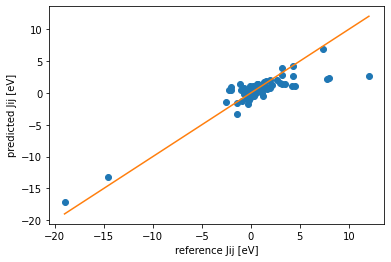

R^2 score on test set: 0.767 

---------------------------------------------------------
n_max= 1, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.611 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.712 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.750 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.544 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.631 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.701 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.566 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.646 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.677 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.849 

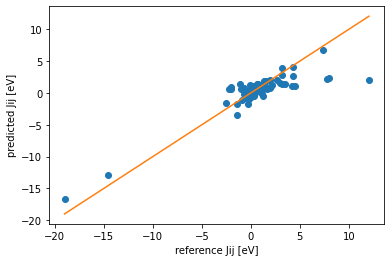

R^2 score on test set: 0.753 

---------------------------------------------------------
n_max= 1, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.592 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.685 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.733 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.537 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.620 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.694 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.565 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.641 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.684 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.807 

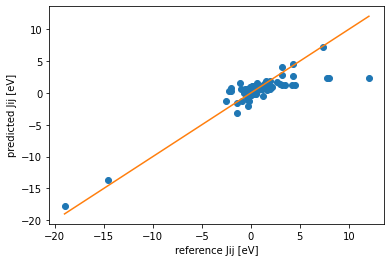

R^2 score on test set: 0.763 

---------------------------------------------------------
n_max= 2, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.613 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.740 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.755 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.563 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.679 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.721 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.693 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.865 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.877 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.849 

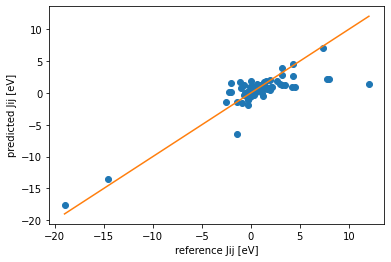

R^2 score on test set: 0.713 

---------------------------------------------------------
n_max= 2, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.568 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.654 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.730 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.530 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.622 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.682 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.575 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.685 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.732 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.724 

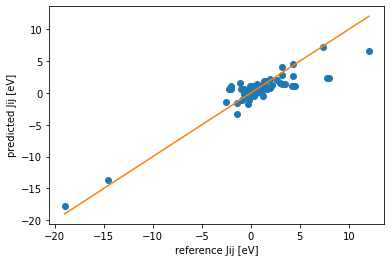

R^2 score on test set: 0.823 

---------------------------------------------------------
n_max= 2, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.564 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.654 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.728 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.534 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.632 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.688 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.614 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.735 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.772 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.682 

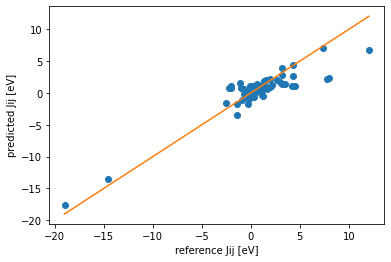

R^2 score on test set: 0.820 

---------------------------------------------------------
n_max= 2, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.553 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.631 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.709 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.535 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.614 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.677 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.588 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.688 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.750 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.646 

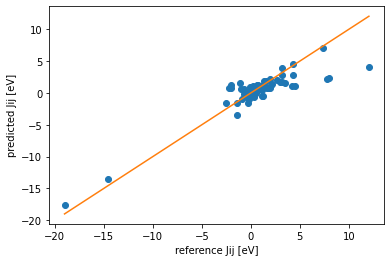

R^2 score on test set: 0.789 

---------------------------------------------------------
n_max= 3, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.580 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.695 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.727 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.554 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.647 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.698 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.677 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.818 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.850 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.743 

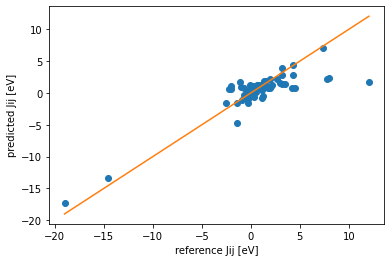

R^2 score on test set: 0.733 

---------------------------------------------------------
n_max= 3, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.558 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.639 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.721 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.537 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.625 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.674 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.600 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.714 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.772 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.637 

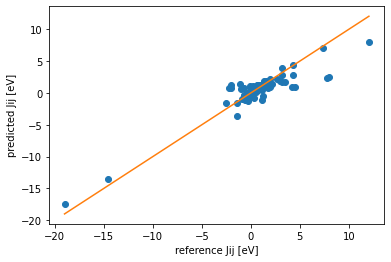

R^2 score on test set: 0.835 

---------------------------------------------------------
n_max= 3, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.557 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.644 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.723 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.548 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.642 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.684 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.655 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.782 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.834 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.610 

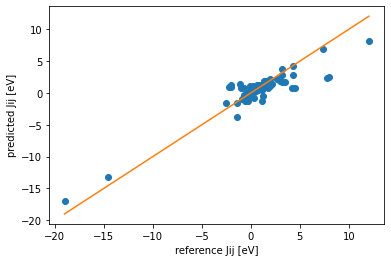

R^2 score on test set: 0.829 

---------------------------------------------------------
n_max= 3, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.546 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.621 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.697 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.550 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.622 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.681 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.614 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.697 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.796 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.589 

R^2 score on test set: 0.779 

---------------------------------------------------------
n_max= 4, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.565 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.685 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.724 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.593 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.686 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.733 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.823 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.024 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.998 total time=   0.3s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.671 

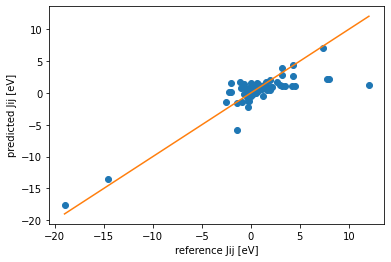

R^2 score on test set: 0.711 

---------------------------------------------------------
n_max= 4, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.563 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.648 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.729 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.564 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.643 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.710 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.635 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.767 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.808 total time=   0.3s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.608 

R^2 score on test set: 0.791 

---------------------------------------------------------
n_max= 4, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.563 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.655 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.732 total time=   0.4s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.579 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.668 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.723 total time=   0.4s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.710 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.851 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.899 total time=   0.4s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.598 

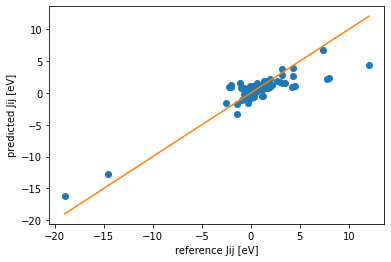

R^2 score on test set: 0.780 

---------------------------------------------------------
n_max= 4, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.554 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.636 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.709 total time=   0.4s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.571 total time=   0.4s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.650 total time=   0.4s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.719 total time=   0.4s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.633 total time=   0.5s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.685 total time=   0.5s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.820 total time=   0.5s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.572 

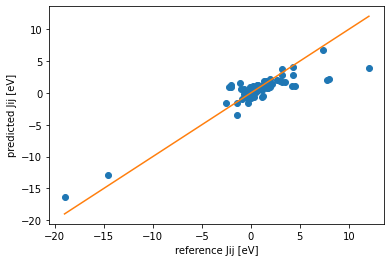

R^2 score on test set: 0.776 

---------------------------------------------------------


In [46]:
from dscribe.descriptors import SOAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

r_cut = 4.0
sigma = 1.0

for n_max in range(1,5):
    for l_max in range(1,5):
        # set up SOAP features using the parameter you change
        soap2 = SOAP(r_cut= r_cut,
                     n_max= n_max, 
                     l_max= l_max, 
                     sigma= sigma, 
                     rbf= "gto", 
                     weighting= None, 
                     crossover= True, 
                     average= "inner", 
                     species= species, 
                     periodic= False, 
                     sparse= False, 
                     dtype= "float64"    
                     )
    
        # then do the model training and evaluation
        samples = structures
        positions = np.zeros((len(samples),1), dtype=int)

        #n_features = soap.get_number_of_features()

        positions = [[0,7] for i in range(len(samples))]

        soap2 = soap2.create(samples, positions, n_jobs=2)  # Parallel
    
        # set soap as features
        x = soap2

        # set J as target labels
        y = table.iloc[:,8]
      

        # Standarization
        scaler = MinMaxScaler()
        x = scaler.fit_transform(x)
    
        #c = list(zip(x, y))
        #random.shuffle(c)

        #x, y = zip(*c)

        #x = np.array(x)
        #y = np.array(y)
        
        print("n_max= %d, l_max=%d \n" % (n_max, l_max))
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

        #plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
        #plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
        #plt.xlabel("J")
        #plt.ylabel("Number of molecules")
        #plt.legend()
        #plt.show()
    
        alpha = np.logspace(-4, -2, 3)
        gamma = np.logspace(-4, -2, 3)

        cv_number = 3 ## choose into how many parts training set is divided for cross-validation
        kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
        scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

        ## define settings for grid search routine in scikit-learn with above defined grids as input

        grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                                   [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                                   cv = cv_number, 
                                   scoring = scoring_function,
                                   verbose=3)  ## produces detailed output statements of grid search 
                                                  # routine so we can see what is computed
    
        # call the fit function in scikit-learn which fits the SOAP matrices in the training set to their corresponding Jij.
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
    
        # predicted Jij for all test molecules

        y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                             # of hyperparameters from grid search

        print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

        # do the regression plot
        plt.plot(y_test, y_pred, 'o')
        plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
        plt.xlabel('reference Jij [eV]')
        plt.ylabel('predicted Jij [eV]')
        plt.show()
        print("R^2 score on test set: %.3f \n" % r2_score(y_test, y_pred))
        print("---------------------------------------------------------")

### KKR and set test size = 0.25

n_max= 1, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.915 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.019 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.958 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.803 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.851 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.897 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.830 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.855 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.969 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.988 total time=   0.0s
[CV 2/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.059 tota

R^2 score on test set: 0.556 

---------------------------------------------------------
n_max= 1, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.792 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.900 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.880 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.723 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.797 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.844 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.731 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.789 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.837 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.919 

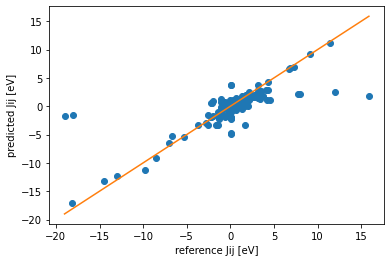

R^2 score on test set: 0.594 

---------------------------------------------------------
n_max= 1, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.771 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.875 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.855 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.721 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.791 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.838 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.743 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.808 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.834 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.909 

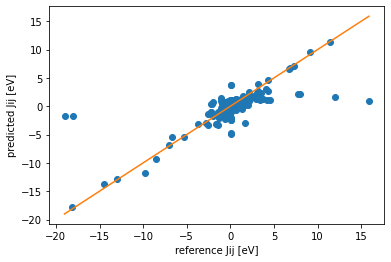

R^2 score on test set: 0.580 

---------------------------------------------------------
n_max= 1, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.750 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.845 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.839 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.712 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.773 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.828 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.740 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.793 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.831 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.879 

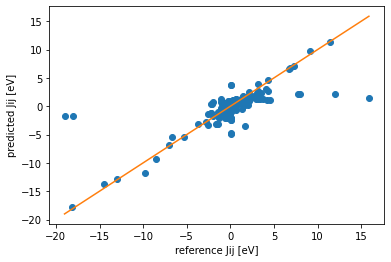

R^2 score on test set: 0.588 

---------------------------------------------------------
n_max= 2, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.829 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.899 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.904 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.791 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.823 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.901 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.979 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.007 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.074 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.952 

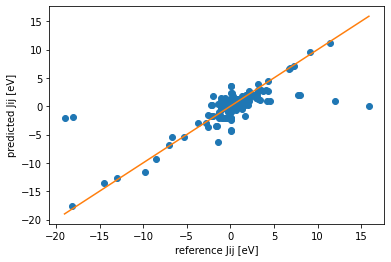

R^2 score on test set: 0.562 

---------------------------------------------------------
n_max= 2, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.742 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.831 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.855 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.717 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.786 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.832 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.754 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.860 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.871 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.831 

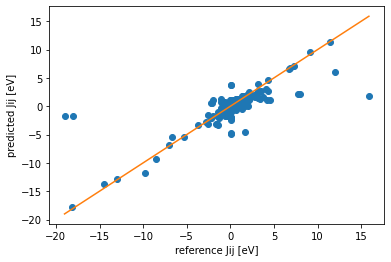

R^2 score on test set: 0.611 

---------------------------------------------------------
n_max= 2, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.735 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.821 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.846 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.722 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.792 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.828 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.777 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.890 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.891 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.812 

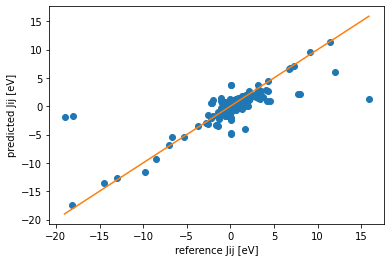

R^2 score on test set: 0.608 

---------------------------------------------------------
n_max= 2, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.722 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.794 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.835 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.714 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.763 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.820 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.743 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.839 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.865 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.780 

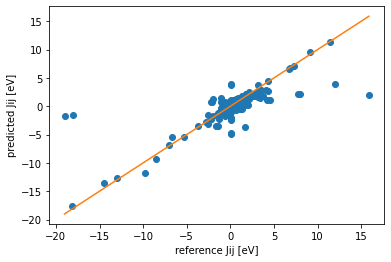

R^2 score on test set: 0.603 

---------------------------------------------------------
n_max= 3, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.785 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.849 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.881 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.757 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.810 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.861 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.882 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.006 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.020 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.899 

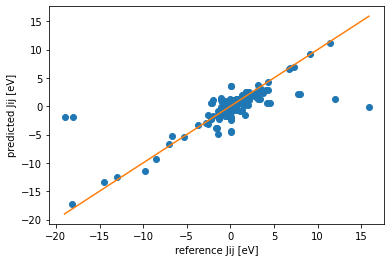

R^2 score on test set: 0.570 

---------------------------------------------------------
n_max= 3, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.731 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.810 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.846 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.725 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.787 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.823 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.764 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.862 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.891 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.784 

R^2 score on test set: 0.573 

---------------------------------------------------------
n_max= 3, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.729 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.806 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.840 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.740 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.802 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.820 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.791 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.902 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.936 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.767 

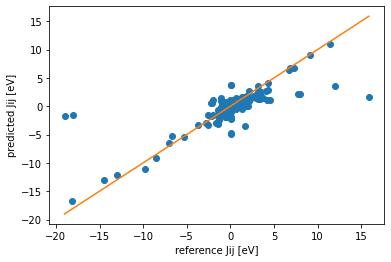

R^2 score on test set: 0.597 

---------------------------------------------------------
n_max= 3, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.718 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.776 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.825 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.734 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.767 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.820 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.737 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.821 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.896 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.743 

R^2 score on test set: 0.597 

---------------------------------------------------------
n_max= 4, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.789 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.841 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.898 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.823 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.856 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.951 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.021 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.160 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.252 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.870 

R^2 score on test set: 0.561 

---------------------------------------------------------
n_max= 4, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.751 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.812 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.872 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.751 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.812 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.888 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.805 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.892 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.936 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.780 

R^2 score on test set: 0.599 

---------------------------------------------------------
n_max= 4, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.747 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.810 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.867 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.766 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.833 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.889 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.844 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.948 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.997 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.767 

R^2 score on test set: 0.604 

---------------------------------------------------------
n_max= 4, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.732 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.787 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.856 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.752 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.799 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.895 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.731 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.776 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.918 total time=   0.3s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.735 

R^2 score on test set: 0.487 

---------------------------------------------------------


In [43]:
from dscribe.descriptors import SOAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

r_cut = 4.0
sigma = 1.0

for n_max in range(1,5):
    for l_max in range(1,5):
        # set up SOAP features using the parameter you change
        soap2 = SOAP(r_cut= r_cut,
                     n_max= n_max, 
                     l_max= l_max, 
                     sigma= sigma, 
                     rbf= "gto", 
                     weighting= None, 
                     crossover= True, 
                     average= "inner", 
                     species= species, 
                     periodic= False, 
                     sparse= False, 
                     dtype= "float64"    
                     )
    
        # then do the model training and evaluation
        samples = structures
        positions = np.zeros((len(samples),1), dtype=int)

        #n_features = soap.get_number_of_features()

        positions = [[0,7] for i in range(len(samples))]

        soap2 = soap2.create(samples, positions, n_jobs=2)  # Parallel
    
        # set soap as features
        x = soap2

        # set J as target labels
        y = table.iloc[:,8]
    
        # Standarization
        scaler = MinMaxScaler()
        x = scaler.fit_transform(x)
    
        #c = list(zip(x, y))
        #random.shuffle(c)

        #x, y = zip(*c)

        #x = np.array(x)
        #y = np.array(y)
        
        print("n_max= %d, l_max=%d \n" % (n_max, l_max))
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

        #plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
        #plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
        #plt.xlabel("J")
        #plt.ylabel("Number of molecules")
        #plt.legend()
        #plt.show()
    
        alpha = np.logspace(-4, -2, 3)
        gamma = np.logspace(-4, -2, 3)

        cv_number = 3 ## choose into how many parts training set is divided for cross-validation
        kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
        scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

        ## define settings for grid search routine in scikit-learn with above defined grids as input

        grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                                   [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                                   cv = cv_number, 
                                   scoring = scoring_function,
                                   verbose=3)  ## produces detailed output statements of grid search 
                                                  # routine so we can see what is computed
    
        # call the fit function in scikit-learn which fits the SOAP matrices in the training set to their corresponding Jij.
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
    
        # predicted Jij for all test molecules

        y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                             # of hyperparameters from grid search

        print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

        # do the regression plot
        plt.plot(y_test, y_pred, 'o')
        plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
        plt.xlabel('reference Jij [eV]')
        plt.ylabel('predicted Jij [eV]')
        plt.show()
        print("R^2 score on test set: %.3f \n" % r2_score(y_test, y_pred))
        print("---------------------------------------------------------")

### KKR and set test size = 0.35

n_max= 1, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.047 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.976 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-1.000 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.998 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.811 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.963 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.048 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.817 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.998 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.067 total time=   0.0s
[CV 2/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.965 tota

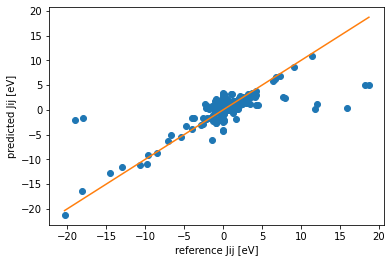

R^2 score on test set: 0.588 

---------------------------------------------------------
n_max= 1, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.925 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.856 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.922 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.889 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.751 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.892 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.877 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.743 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.882 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.006 

R^2 score on test set: 0.616 

---------------------------------------------------------
n_max= 1, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.920 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.836 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.905 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.892 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.750 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.881 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.892 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.767 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.887 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.014 

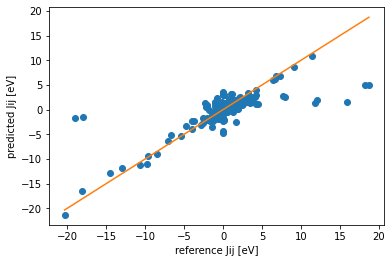

R^2 score on test set: 0.607 

---------------------------------------------------------
n_max= 1, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.896 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.806 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.890 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.876 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.733 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.871 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.885 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.750 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.885 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.989 

R^2 score on test set: 0.615 

---------------------------------------------------------
n_max= 2, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.998 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.861 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.982 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.980 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.769 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.956 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.199 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.914 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.105 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.054 

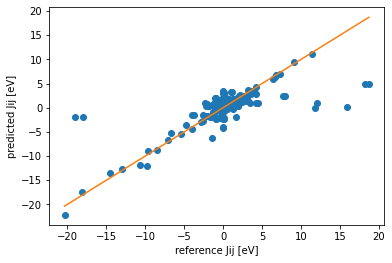

R^2 score on test set: 0.585 

---------------------------------------------------------
n_max= 2, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.900 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.785 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.910 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.884 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.734 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.882 total time=   0.0s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.907 total time=   0.0s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.756 total time=   0.0s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.931 total time=   0.0s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.942 

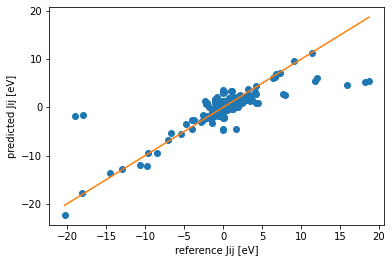

R^2 score on test set: 0.656 

---------------------------------------------------------
n_max= 2, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.902 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.780 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.900 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.892 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.745 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.878 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.930 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.785 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.954 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.936 

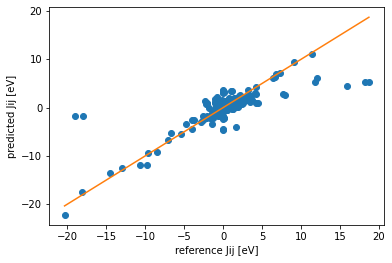

R^2 score on test set: 0.656 

---------------------------------------------------------
n_max= 2, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.882 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.755 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.885 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.874 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.725 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.867 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.902 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.762 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.926 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.910 

R^2 score on test set: 0.633 

---------------------------------------------------------
n_max= 3, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.964 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.809 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.948 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.929 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.766 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.907 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.041 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.886 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.011 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.016 

R^2 score on test set: 0.587 

---------------------------------------------------------
n_max= 3, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.889 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.764 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.904 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.880 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.728 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.877 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.912 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.747 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.947 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.907 

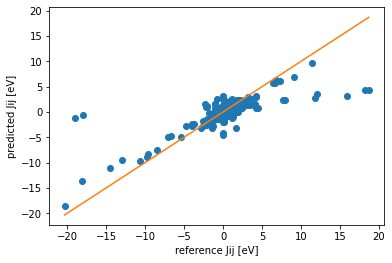

R^2 score on test set: 0.592 

---------------------------------------------------------
n_max= 3, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.893 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.763 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.896 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.890 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.754 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.888 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.941 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.779 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.981 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.905 

R^2 score on test set: 0.628 

---------------------------------------------------------
n_max= 3, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.875 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.735 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.880 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.876 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.735 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.880 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.876 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.738 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.953 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.882 

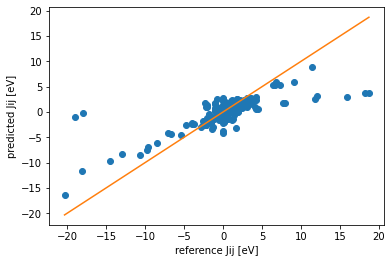

R^2 score on test set: 0.553 

---------------------------------------------------------
n_max= 4, l_max=1 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.979 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.790 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.972 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.982 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.812 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-1.009 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.211 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.038 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.167 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-1.006 

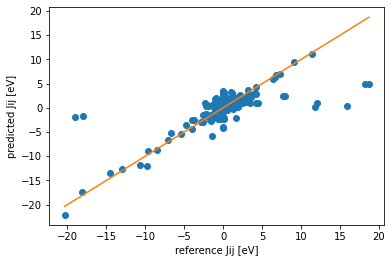

R^2 score on test set: 0.590 

---------------------------------------------------------
n_max= 4, l_max=2 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.910 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.780 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.942 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.903 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.764 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.946 total time=   0.1s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.941 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.785 total time=   0.1s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.964 total time=   0.1s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.908 

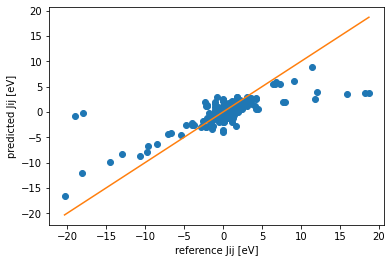

R^2 score on test set: 0.561 

---------------------------------------------------------
n_max= 4, l_max=3 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.919 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.781 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.937 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.925 total time=   0.1s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.797 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.957 total time=   0.2s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.974 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.829 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-1.010 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.911 

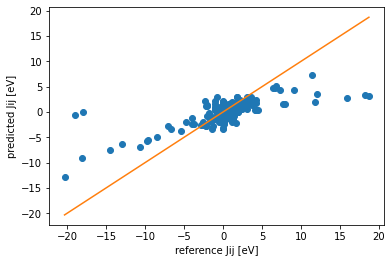

R^2 score on test set: 0.486 

---------------------------------------------------------
n_max= 4, l_max=4 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.899 total time=   0.2s
[CV 2/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.762 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.0001, kernel=rbf;, score=-0.918 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.911 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.771 total time=   0.2s
[CV 3/3] END alpha=0.0001, gamma=0.001, kernel=rbf;, score=-0.953 total time=   0.3s
[CV 1/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.836 total time=   0.3s
[CV 2/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.695 total time=   0.3s
[CV 3/3] END alpha=0.0001, gamma=0.01, kernel=rbf;, score=-0.964 total time=   0.2s
[CV 1/3] END alpha=0.001, gamma=0.0001, kernel=rbf;, score=-0.881 

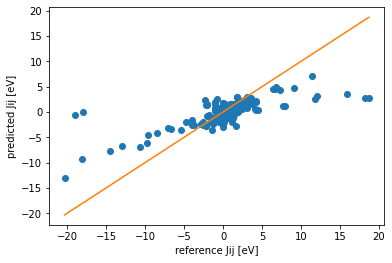

R^2 score on test set: 0.489 

---------------------------------------------------------


In [44]:
from dscribe.descriptors import SOAP
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score

r_cut = 4.0
sigma = 1.0

for n_max in range(1,5):
    for l_max in range(1,5):
        # set up SOAP features using the parameter you change
        soap2 = SOAP(r_cut= r_cut,
                     n_max= n_max, 
                     l_max= l_max, 
                     sigma= sigma, 
                     rbf= "gto", 
                     weighting= None, 
                     crossover= True, 
                     average= "inner", 
                     species= species, 
                     periodic= False, 
                     sparse= False, 
                     dtype= "float64"    
                     )
    
        # then do the model training and evaluation
        samples = structures
        positions = np.zeros((len(samples),1), dtype=int)

        #n_features = soap.get_number_of_features()

        positions = [[0,7] for i in range(len(samples))]

        soap2 = soap2.create(samples, positions, n_jobs=2)  # Parallel
    
        # set soap as features
        x = soap2

        # set J as target labels
        y = table.iloc[:,8]

        # Standarization
        scaler = MinMaxScaler()
        x = scaler.fit_transform(x)
    
        #c = list(zip(x, y))
        #random.shuffle(c)

        #x, y = zip(*c)

        #x = np.array(x)
        #y = np.array(y)
        
        print("n_max= %d, l_max=%d \n" % (n_max, l_max))
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

        #plt.hist(y_test, bins=100, density=False, alpha=0.5, facecolor='red', label='test set')
        #plt.hist(y_train, bins=100, density=False, alpha=0.5, facecolor='gray', label='training set')
        #plt.xlabel("J")
        #plt.ylabel("Number of molecules")
        #plt.legend()
        #plt.show()
    
        alpha = np.logspace(-4, -2, 3)
        gamma = np.logspace(-4, -2, 3)

        cv_number = 3 ## choose into how many parts training set is divided for cross-validation
        kernel = 'rbf' # select kernel function here ('rbf': Gaussian kernel, 'laplacian': Laplacian kernel)
        scoring_function = 'neg_mean_absolute_error' # it is called "negative" because scikit-learn interprets
                                             # highest scoring value as best, but we want small errors

        ## define settings for grid search routine in scikit-learn with above defined grids as input

        grid_search = GridSearchCV(KernelRidge(),  #machine learning method (KRR here)
                                   [{'kernel':[kernel],'alpha': alpha, 'gamma': gamma}], 
                                   cv = cv_number, 
                                   scoring = scoring_function,
                                   verbose=3)  ## produces detailed output statements of grid search 
                                                  # routine so we can see what is computed
    
        # call the fit function in scikit-learn which fits the SOAP matrices in the training set to their corresponding Jij.
        grid_search.fit(x_train, y_train)
        print(grid_search.best_params_)
    
        # predicted Jij for all test molecules

        y_pred = grid_search.predict(x_test) # scikit-learn automatically takes the best combination
                                             # of hyperparameters from grid search

        print("Mean absolute error on test set: %0.3f eV" %(np.abs(y_pred-y_test)).mean())

        # do the regression plot
        plt.plot(y_test, y_pred, 'o')
        plt.plot([np.min(y_test),np.max(y_test)], [np.min(y_test),np.max(y_test)], '-')
        plt.xlabel('reference Jij [eV]')
        plt.ylabel('predicted Jij [eV]')
        plt.show()
        print("R^2 score on test set: %.3f \n" % r2_score(y_test, y_pred))
        print("---------------------------------------------------------")